In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## kmeans, k-Nearest-Neighbor,Regression, Classification Metrics, Clustering
----


## KMeans Clustering
----


It is an Unsupervised learning technique


‘K’ in K-Means is the number of clusters 

The clusters are often unknown since this is used with Unsupervised learning.




It is typically used for scenarios like understanding the population demomgraphics, market segmentation, social media trends, anomaly detection, etc. where the clusters are unknown to begin with.




In training phase of K-Means, K observations are  selected (known as centroids). 

Each point in the vector space is assigned to a cluster represented by nearest (euclidean distance) centroid.

Once the clusters are formed, for each cluster the centroid is updated to the mean of all cluster members. 

And the cluster formation restarts with new centroids. 
This repeats until the centroids themselves become mean of clusters, 

>The prediction of a test observation is done based on nearest centroid.

In [2]:
df = pd.read_csv('../../data/loan_knn.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X = df.iloc[ : , -2:]

In [5]:
X.head()

,total_cu_tl,inq_last_12m
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [8]:
preprocessor = ColumnTransformer(transformers=[
    ('transformer', transformer, [0,1])
])

In [9]:
from sklearn.cluster import KMeans

### Elbow Plots: Determining Optimal K
----

When K increases, the centroids are closer to the clusters centroids.

The improvements will decline, at some point rapidly, creating the elbow shape.

In [10]:
wcss = []

In [11]:
for i in range(1, 11):
    kmeans = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('kmeansa', KMeans(n_clusters=i))])
    kmeans.fit(X)
    wcss.append(kmeans.named_steps["kmeansa"].inertia_)

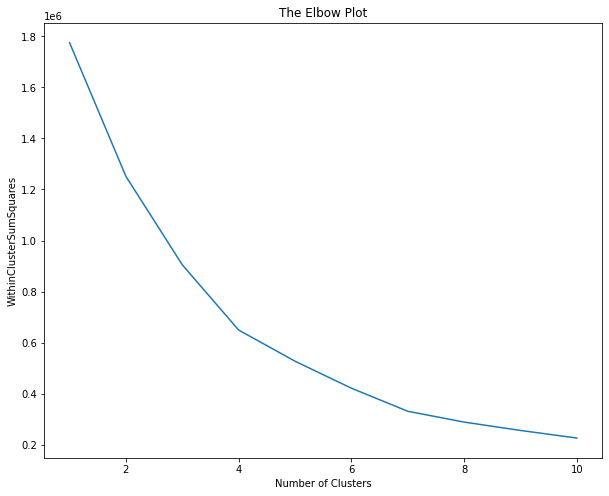

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WithinClusterSumSquares')
plt.show()

In [13]:
kmeans = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('kmeansa', KMeans(n_clusters=5))])
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)

In [14]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Mr.k and His Neighborhood
----
* Hedonic Regressions can be used to break down compositions of baskets of items that are assembled of items

* Intsead of focusing on fitting a curve to a bag of attributes, it focuses on the components of the bag. 


### `KNN` Development
----

#### Agorithm was introduced by Drs. Evelyn Fix and J. L. Hodges Jr,
* An unpublished technical report written for the U.S. Air Force School of Aviation Medicine. Fix and Hodges’ original research focused on splitting up classification problems into a few subproblems:
- Distributions F and G are completely known.
- Distributions F and G are completely known except for a few parameters.
- F and G are unknown, except possibly for the existence of densities.

Fix and Hodges pointed out 
if you know the distributions of two classifications or
you know the distribution minus some parameters,
you can easily back out useful solutions.


#### The Algorithm can take two forms, a regression to produce a value, or a classification.


KNN can be used for both classification and regression problems. The algorithm uses **feature similarity** to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set

#### Generic Steps
----
1. Distance to a new data point is calcualted in regards to the training data
2. The closest `k` data points are selected 
3. The average of these data points is the final prediction

K-NN doesn’t have a training phase as such. But the prediction of a test observation is done based on the K-Nearest (often euclidean distance) Neighbours (observations) based on weighted averages/votes.

### Distance Methods - _As the Crow Flies_
----
Calculating the distance between points can be done in may ways:
* generally are: geometric, computaional, and statistical

#### A Few Small Examples
----
1. **Eculidean**: the square root of the sum of the squared differences of new point `x` and existing point `y`
2. **Manhattan**: sum of their absolute values
3. **Hamming**: **Categorical Variables**; if the value of `x` and the value of `y` are the same, the distance will be 0, otherwise, distance is `

### Choosing the Optimal `k`
----
* The predicted value will change according to the value of `k` that is chosen.
* Use an error calculation to choose the optimum k in order to trian the model
* **Elbow Curves**: are plots of the validation error inside knn models, they will show you graphically where the optimum `k` will be

## KNN Regressions
----

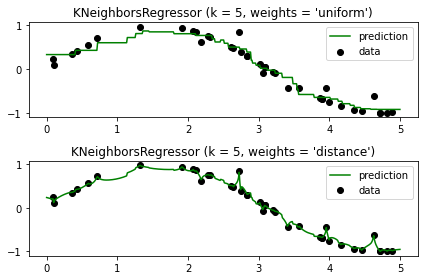

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv("../../data/50_Startups.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/50_Startups.csv'

In [ ]:
df.head()

In [ ]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [ ]:
categorical_features = ['State']
numeric_features = ['R&D Spend', 'Administration', 'Marketing Spend']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot' , OneHotEncoder(sparse=False))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = Pipeline(steps= [ ("preprocess", preprocessor), ("knn_model", KNeighborsRegressor(n_neighbors=7))])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

plt.plot(y_pred)

## KNN Classifier Model
----


In [ ]:
df = pd.read_csv('../../data/loan_knn.csv')

### Run a  Logistic First
----


In [ ]:
df.head()

In [ ]:
df.Default.value_counts()

### Preprocess your data
----


In [ ]:
X = df[["Gender", "Age", "Salary"]]

In [ ]:
y = df["Default"]

### Create your impute variables
----

In [ ]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Create the Transformers
----

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean")),
    ("scaling", StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

### Create your Model Pipeline for the Logistic Regression
----

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logistic_model', LogisticRegression())
])

### Split the data for triaining and testing
----

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_pred_prob = model.predict_proba(X_test)[: , 1]
y_pred_prob

### Test the Models Accuracy
----

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

### Plot the ROC and AUC Scores
---

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')


In [ ]:
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Plot the Confusion Matrix
-----

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm, df.Default.unique())

In [ ]:
df.Default.unique()

### KNN Classifier
----
* The Classfier is simple to implement and will output the category it believes according the majority vote

In [ ]:
df.head()

### Assign the `x` and `y` values
---

In [ ]:
X = df[["Gender", "Age", "Salary"]]

In [ ]:
y = df["Default"]

In [ ]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

### Import your toolset
----

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean")),
    ("scaling", StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

### Import the KNeighborsClassifer and build your model pipeline
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('knn_model', KNeighborsClassifier(n_neighbors=5))
])

### Split the Dataset into trainging and test sets; fit your models
----

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_pred_prob = model.predict_proba(X_test)[: , 1]
y_pred_prob

### Test the Models accuracy and plot the AUC and ROC
----

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Plot and Print the Confusion Matrix
----

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
plot_confusion_matrix(cm, df.Default.unique())

### Heirarchical Clustering
----
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. 

Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. In some cases the result of hierarchical and K-Means clustering can be similar




### Theory of Hierarchical Clustering
----
There are two types of hierarchical clustering: Agglomerative and Divisive. In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters. 

### Steps
---

1. At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3.  Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4.  Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, **dendrograms** are used to divide into multiple clusters depending upon the problem. 


### Distance Meaures 
----

Similar methods to KNN:
* Distance itself can be Euclidean or Manhattan distance. 

Following are some of the options to measure distance between two clusters:

    Measure the distance between the closes points of two clusters.
    Measure the distance between the farthest points of two clusters.
    Measure the distance between the centroids of two clusters.
    Measure the distance between all possible combination of points between the two clusters and take the mean.
 
 
 

## Dendrograms
----

once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance.

Therefore a cluster will be formed between these two points first.




The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster.

This process continues until all the points are joined together to form one big cluster.


Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

the horizontal line is a threshold, which defines the minimum distance required to be a separate cluster. If we draw a line further down, the threshold required to be a new cluster will be decreased and more clusters will be formed 

In [ ]:
from IPython.display import Image
Image("../src/photos/dendrogram_threshold.png")

### Read in the Data
----


In [ ]:
df = pd.read_csv("../../data/Customers.csv")

### Check the data
---
We'll be taking the last two columns and using them inside the model as `X`

In [ ]:
df.head()

### Assign the `x` vector
----

In [ ]:
X = df.iloc[ : , -2:]

In [ ]:
X.head()

### Clean and Preprocess the Data
----

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Transform and Preprocess Pipeline Variables
----

In [ ]:
transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('transformer', transformer, [0,1])
])

### Plot a Dendrogram
----

In [ ]:
!pip install scipy

In [ ]:
X.shape

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
# dendrok
grams = sch.dendrogram(sch.linkage(preprocessor.fit_transform(X), method = 'ward' ))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

### Import The Agglomerative Clustering Class
-----

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc = Pipeline(steps=[
            ('preprocess', preprocessor),
            ('hc', AgglomerativeClustering(n_clusters= 5, affinity='euclidean', linkage='ward')
)])

In [ ]:
hc.fit(X)

In [ ]:
y_pred = hc.fit_predict(X)

In [ ]:
y_pred

In [ ]:
data= df.iloc[:, 3:5].values

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=hc., cmap='rainbow') 

In [ ]:
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])


In [ ]:
clustering = AgglomerativeClustering().fit(X)

In [ ]:
clustering.labels_